In [1]:
import pandas as pd

data = pd.read_csv("heart.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
data.tail()
data.drop(['oldpeak'],axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1,0,3,0
300,68,1,0,144,193,1,1,141,0,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1,1,3,0


In [4]:
from sklearn.model_selection import train_test_split

x = data.drop('target',axis=1)
y=data['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=64)


In [5]:
from sklearn.tree import DecisionTreeClassifier

declf = DecisionTreeClassifier()

In [6]:
declf.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
y_pred = declf.predict(x_test)

In [8]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1 Score:",metrics.f1_score(y_test,y_pred))


Accuracy: 0.7032967032967034
Precision: 0.7254901960784313
Recall: 0.74
F1 Score: 0.7326732673267327


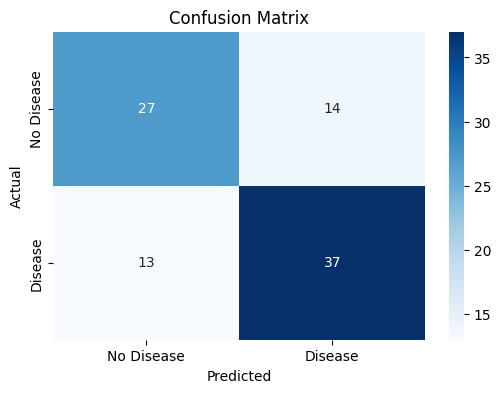

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

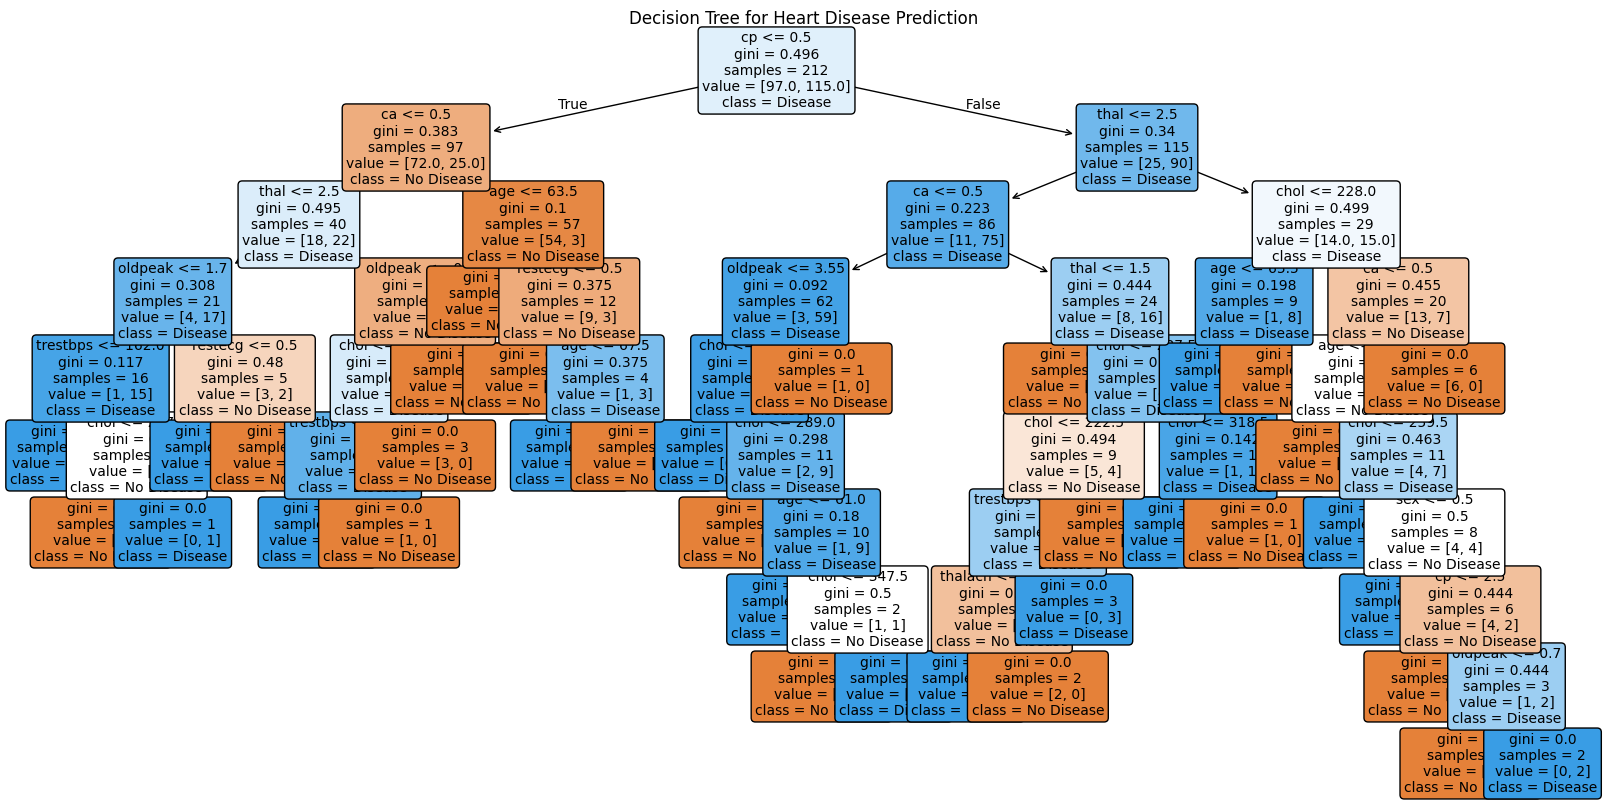

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(declf, feature_names=x.columns, class_names=["No Disease", "Disease"], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Heart Disease Prediction")
plt.show()